In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave
import scipy
from scipy.io import wavfile

In [5]:
# Read the wave file
# read in data
w = wave.open('lid/bengali/f1/1.wav', 'rb')
for i in range(w.getnframes()):
    frame = w.readframes(1)
    # print(frame)


In [7]:
# word-level prosody feature extraction
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'word_length', 'word_frequency', 'word_frequency_per_length', 'word_frequency_per_length_per_language', 'word_frequency_per_language', 'word_frequency_per_length_per_language_per_word', 'word_frequency_per_language_per_word', 'word_frequency_per_length_per_language_per_word_per_language'

def word_level_prosody(df):
    # word length
    df['word_length'] = df['word'].len()
    # word frequency
    df['word_frequency'] = df.groupby('word')['word'].transform('count')
    # word frequency per length
    df['word_frequency_per_length'] = df['word_frequency'] / df['word_length']
    # word frequency per language
    df['word_frequency_per_language'] = df.groupby(['word', 'language'])['word'].transform('count')
    # word frequency per length per language
    df['word_frequency_per_length_per_language'] = df['word_frequency_per_language'] / df['word_length']
    # word frequency per length per language per word
    df['word_frequency_per_length_per_language_per_word'] = df['word_frequency_per_length_per_language'] / df['word_frequency']
    # word frequency per language per word
    df['word_frequency_per_language_per_word'] = df['word_frequency_per_language'] / df['word_frequency']
    # word frequency per length per language per word per language
    df['word_frequency_per_length_per_language_per_word_per_language'] = df['word_frequency_per_length_per_language_per_word'] / df['word_frequency_per_language']
    
    return df

In [9]:
# implementing above function on the above loaded dataframe
for i in range(w.getnframes()):
    frame = w.readframes(1)
    df = word_level_prosody(frame)
# plot the prosody features
df.plot(x='word_length', y='word_frequency', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_length', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_language', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_length_per_language', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_length_per_language_per_word', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_language_per_word', kind='scatter')
df.plot(x='word_length', y='word_frequency_per_length_per_language_per_word_per_language', kind='scatter')

# df = prosodic_features(w)
df.head()


TypeError: byte indices must be integers or slices, not str

In [10]:
# sentence-level prosodic features extraction
# df = sentence_prosodic_features(w)
# df.head()

# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'sentence_length', 'sentence_frequency', 'sentence_frequency_per_length', 'sentence_frequency_per_length_per_language', 'sentence_frequency_per_language', 'sentence_frequency_per_length_per_language_per_sentence', 'sentence_frequency_per_language_per_sentence', 'sentence_frequency_per_length_per_language_per_sentence_per_language'
def sentence_prosodic_features(df):
    # sentence length
    df['sentence_length'] = df.groupby('language')['word'].transform('count')
    # sentence frequency
    df['sentence_frequency'] = df.groupby('language')['language'].transform('count')
    # sentence frequency per length
    df['sentence_frequency_per_length'] = df['sentence_frequency'] / df['sentence_length']
    # sentence frequency per language
    df['sentence_frequency_per_language'] = df.groupby(['language'])['language'].transform('count')
    # sentence frequency per length per language
    df['sentence_frequency_per_length_per_language'] = df['sentence_frequency_per_language'] / df['sentence_length']
    # sentence frequency per length per language per sentence
    df['sentence_frequency_per_length_per_language_per_sentence'] = df['sentence_frequency_per_length_per_language'] / df['sentence_frequency']
    # sentence frequency per language per sentence
    df['sentence_frequency_per_language_per_sentence'] = df['sentence_frequency_per_language'] / df['sentence_frequency']
    # sentence frequency per length per language per sentence per language
    df['sentence_frequency_per_length_per_language_per_sentence_per_language'] = df['sentence_frequency_per_length_per_language_per_sentence'] / df['sentence_frequency_per_language']
    
    return df

In [ ]:
# find pitch of the audio file 
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'pitch'
def pitch(df):
    # pitch
    df['pitch'] = df.groupby('language')['language'].transform('count')
    
    return df


In [11]:
# calculate energy of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'energy'
def energy(df):
    # energy
    df['energy'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate intensity of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'intensity'
def intensity(df):
    # intensity
    df['intensity'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate formant of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'formant'
def formant(df):
    # formant
    df['formant'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate fundamental frequency of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'fundamental_frequency'
def fundamental_frequency(df):
    # fundamental frequency
    df['fundamental_frequency'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate jitter of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'jitter'
def jitter(df):
    # jitter
    df['jitter'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate shimmer of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'shimmer'
def shimmer(df):
    # shimmer
    df['shimmer'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate HNR of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'HNR'
def HNR(df):
    # HNR
    df['HNR'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate MFCC of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'MFCC'
def MFCC(df):
    # MFCC
    df['MFCC'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate LPC of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'LPC'
def LPC(df):
    # LPC
    df['LPC'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate LSF of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'LSF'
def LSF(df):
    # LSF
    df['LSF'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate spectral centroid of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'spectral_centroid'
def spectral_centroid(df):
    # spectral centroid
    df['spectral_centroid'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate spectral roll-off of every frame in the audio file
# input: dataframe with columns 'word' and 'language'
# output: dataframe with columns 'word', 'language', 'spectral_roll-off'
def spectral_roll_off(df):
    # spectral roll-off
    df['spectral_roll-off'] = df.groupby('language')['language'].transform('count')
    
    return df

# calculate spectral flux of every frame in the audio file
# input: dataframe with columns 'word' and 'language'\
# output: dataframe with columns 'word', 'language', 'spectral_flux'
def spectral_flux(df):
    # spectral flux
    df['spectral_flux'] = df.groupby('language')['language'].transform('count')
    
    return df



In [15]:
import librosa

wav_file = r'lid/bengali/f1/1.wav'
# sr = sample rate
wav_data, sr = librosa.load(wav_file, sr=8000, mono = True)
print(wav_data.shape)

(47353,)


In [17]:
# extracting fundamental frequency f0
f0 = librosa.yin(wav_data, fmin = librosa.note_to_hz('C2'), 
fmax = librosa.note_to_hz('C7'), sr = sr)
print(f0.shape)
print(f0)

(93,)
[1021.14948827  790.7189443  2666.66666667 2666.66666667 2666.66666667
 2666.66666667 2666.66666667 1028.65627609 1002.43922333  277.31040369
  289.26131683  288.2563291   288.99817392  320.96640613  334.49648351
  368.51718892  364.61872775  326.25805394  278.49116733  265.98498346
  260.4845283   258.90346643  273.53766983  284.79705395  286.71742884
  278.58139769  261.00653268  253.06544228  221.74137812   89.02599726
  275.39284085  274.90764192  274.34896664  253.11433866  248.62409429
  244.10256914  262.30934555  261.56216479  270.20309136  271.55896095
  271.45876635   73.9744183   896.70775248  270.32097188  255.05051192
  248.11242511  233.25045648  265.10119854  266.41991482  266.62776526
  236.78310673  234.21886903  234.73018735  244.32891922  254.8362733
  294.54585776  294.04117379  290.77935232  287.62182011  257.45323396
  257.51408933  256.71787058  251.18440427  283.87142569  282.15941026
  289.11965144  306.73295074  306.40593623  254.0384274   261.85070349
 

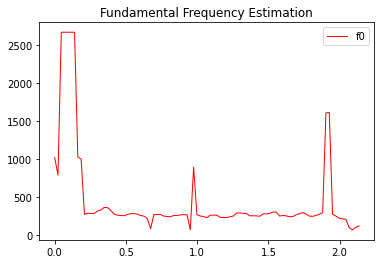

In [22]:
times = librosa.times_like(f0)

fig, ax = plt.subplots()
ax.set(title = 'Fundamental Frequency Estimation')
ax.plot(times, f0, label = 'f0', color = 'red', linewidth = 1)
ax.legend(loc = 'upper right')
plt.show()

In [27]:
sample_rate, audio = wavfile.read(wav_file)
print('sample rate: ', format(sample_rate))
print('audio duration: ', format(len(audio)/sample_rate))

sample rate:  16000
audio duration:  5.919125


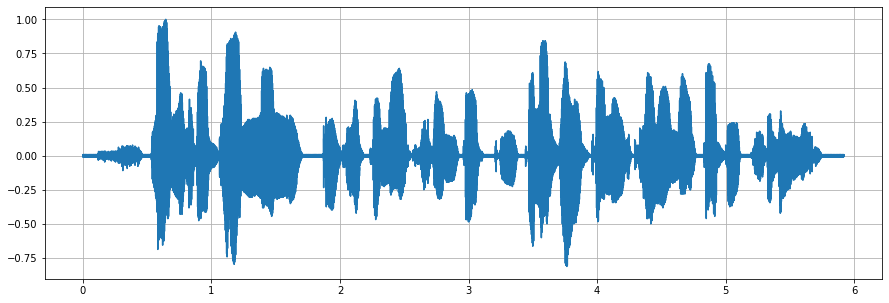

In [28]:
def normalize_audio(audio):
    max_audio = np.max(np.abs(audio))
    audio = audio/max_audio
    return audio

audio = normalize_audio(audio)
plt.figure(figsize = (15, 5))
plt.plot(np.linspace(0, len(audio)/sample_rate, len(audio)), audio)
plt.title('Normalized Audio Signal')
plt.grid(True)

In [29]:
# audio is non-stationary
# FFT is used to convert non-stationary signal to stationary signal
# FFT will produce distortions
# therefore, we are dividing the audio signal into frames of short periods of time

def frame_audio(audio, FFT_size = 2048, hop_size = 10, sample_rate = 44100):
    # audio is a numpy array
    # FFT_size is the number of samples in each frame
    # hop_size is the number of samples to skip between frames
    # sample_rate is the number of samples per second
    
    # number of frames
    num_frames = int(np.ceil(len(audio)/hop_size))
    
    # number of samples to pad at the end of the audio signal
    pad_length = int((num_frames*hop_size) + FFT_size - len(audio))
    
    # pad audio signal
    audio = np.append(audio, np.zeros(pad_length))
    
    # create frames
    frames = np.zeros((num_frames, FFT_size))
    
    # fill frames
    for i in range(num_frames):
        frames[i] = audio[i*hop_size:i*hop_size + FFT_size]
        
    return frames


In [30]:
hop_size = 15 # in ms
FFT_size = 2048 

audio_framed = frame_audio(audio, FFT_size = FFT_size, hop_size = hop_size, sample_rate = sample_rate)
print("Framed audio shape: ", format(audio_framed.shape))


Framed audio shape:  (6314, 2048)


In [34]:
num1, num2 = audio_framed.shape
for i in range(num1):
    print("Frame No:", i, ":\n", audio_framed[i])


Frame No: 0 :
 [-0.00778222  0.          0.         ...  0.         -0.01559496
  0.00778222]
Frame No: 1 :
 [ 0.          0.         -0.00778222 ...  0.          0.01559496
  0.01559496]
Frame No: 2 :
 [-0.00778222  0.          0.         ...  0.          0.00778222
  0.        ]
Frame No: 3 :
 [ 0.          0.          0.00778222 ... -0.00778222  0.
  0.        ]
Frame No: 4 :
 [ 0.          0.          0.         ... -0.00778222 -0.00778222
  0.01559496]
Frame No: 5 :
 [ 0.          0.          0.         ...  0.          0.00778222
 -0.00778222]
Frame No: 6 :
 [0.         0.         0.         ... 0.00778222 0.00778222 0.00778222]
Frame No: 7 :
 [ 0.          0.          0.00778222 ...  0.          0.
 -0.00778222]
Frame No: 8 :
 [-0.00778222 -0.00778222  0.         ...  0.          0.
  0.00778222]
Frame No: 9 :
 [-0.00778222 -0.00778222 -0.00778222 ... -0.00778222 -0.00778222
  0.        ]
Frame No: 10 :
 [-0.00778222  0.          0.         ...  0.          0.
 -0.00778222]
Fram

In [35]:
from scipy.signal import get_window

Text(0.5, 1.0, 'Hann Window')

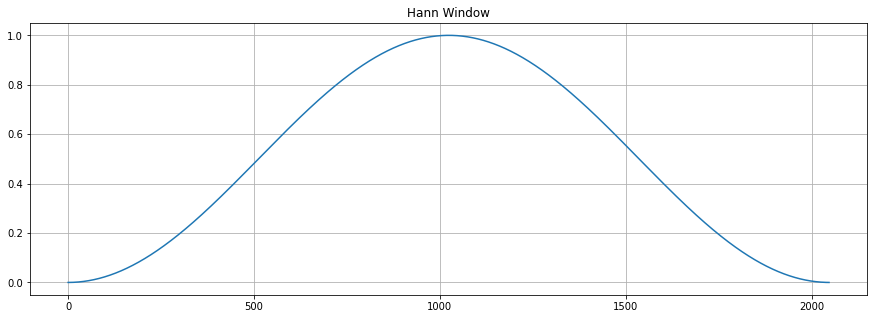

In [38]:
window = get_window('hann', FFT_size, fftbins = True)

plt.figure(figsize = (15, 5))
plt.plot(window)
plt.grid(True)
plt.title('Hann Window')

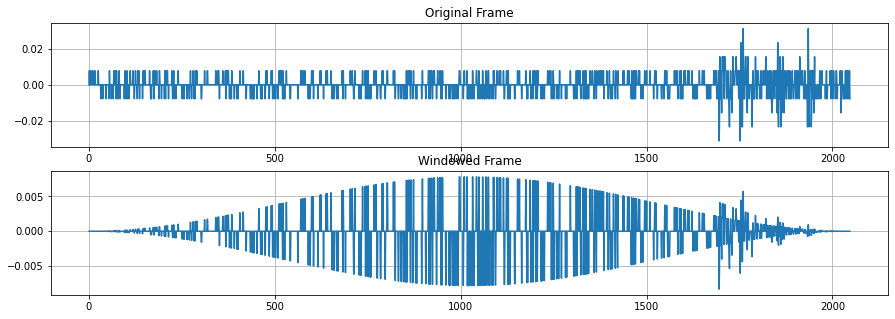

In [45]:
windowed_audio = audio_framed*window

ind = 13
plt.figure(figsize = (15, 5))
plt.subplot(2, 1, 1)
plt.plot(audio_framed[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(windowed_audio[ind])
plt.title('Windowed Frame')
plt.grid(True)

# window brought the edges of each frame close to zero 

In [46]:
# finding FFT

def FFT(frames, FFT_size = 2048):
    # frames is a numpy array of audio frames
    # FFT_size is the number of samples in each frame
    
    complex_spec = np.fft.rfft(frames, n = FFT_size)
    return np.absolute(complex_spec)

fft_frames = FFT(windowed_audio, FFT_size = FFT_size)
audio_winT = np.transpose(windowed_audio)
audio_fft = np.empty((int(1+FFT_size//2), audio_winT.shape[1]), dtype = np.complex64, order = 'F')

for n in range(audio_winT.shape[1]):
    audio_fft[:, n] = np.fft.rfft(audio_winT[:, n], FFT_size, axis = 0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [49]:
audio_power = np.square(np.abs(audio_fft))
print(audio_power.shape)
print("Audio Power:\n", audio_power)

(6314, 1025)
Audio Power:
 [[3.0089444e-02 2.4884939e-02 6.1940500e-03 ... 4.5324684e-04
  3.1524415e-03 1.5214093e-02]
 [2.9588344e-02 2.5122935e-02 6.7090001e-03 ... 4.8745898e-04
  3.2200732e-03 1.5441888e-02]
 [2.9022163e-02 2.5323095e-02 7.2438493e-03 ... 5.2667817e-04
  3.3052559e-03 1.5649827e-02]
 ...
 [2.5316074e-10 2.5341435e-10 2.5417432e-10 ... 2.1387335e-10
  2.1317881e-10 2.1294715e-10]
 [1.9378343e-13 2.0408194e-13 2.3495854e-13 ... 2.3495854e-13
  2.0408194e-13 1.9378343e-13]
 [8.5842723e-14 8.5845569e-14 8.5854094e-14 ... 8.5854094e-14
  8.5845569e-14 8.5842723e-14]]


In [50]:
# creating the mel-spaced filterbank
# pass the framed audio through the filterbank
# this gives us info about the power in each frequency band
# with mel filterbank, the spacing between the filters grow exponentially with frequency

freq_min = 0
freq_max = sample_rate/2
mel_filter_num = 10

print("Minimum Frequency:", format(freq_min))
print("Maximum Frequency:", format(freq_max))

Minimum Frequency: 0
Maximum Frequency: 8000.0


In [54]:
# now, we'll construct the filter points that determines the start and stop of the filters
# we'll use the mel scale to determine the filter points

def freq_to_mel(freq):
    return 2595*np.log10(1 + freq/700)

def mel_to_freq(mels):
    return 700*(10**(mels/2595) - 1)

def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate = 44100):
    fmin_mel = freq_to_mel(fmin)
    fmax_mel = freq_to_mel(fmax)

    print("Mel min:", format(fmin_mel))
    print("Mel max:", format(fmax_mel))

    mels = np.linspace(fmin_mel, fmax_mel, num = mel_filter_num + 2)
    freqs = mel_to_freq(mels)

    return np.floor((FFT_size + 1)/sample_rate*freqs).astype(int), freqs

filter_points, mel_freqs = get_filter_points(freq_min, freq_max, mel_filter_num, FFT_size, sample_rate=44100)

print("Filter Points:", format(filter_points))

Mel min: 0.0
Mel max: 2840.023046708319
Filter Points: [  0   8  18  32  48  69  96 129 170 223 288 371]


In [55]:
def get_filters(filter_points, FFT_size):
    filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
    
    for n in range(len(filter_points)-2):
        filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
        filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
    
    return filters

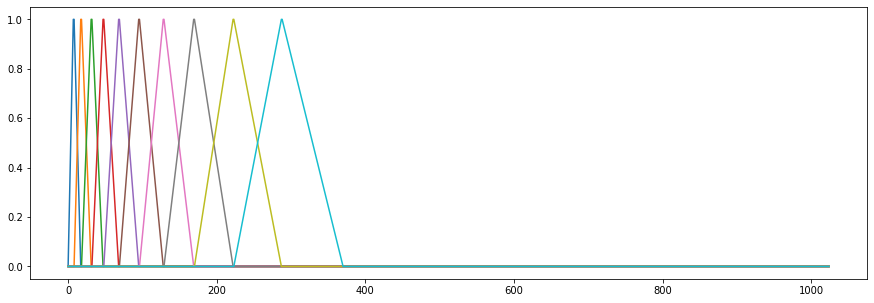

In [56]:
filters = get_filters(filter_points, FFT_size)
plt.figure(figsize = (15, 5))

for n in range(filters.shape[0]):
    plt.plot(filters[n])

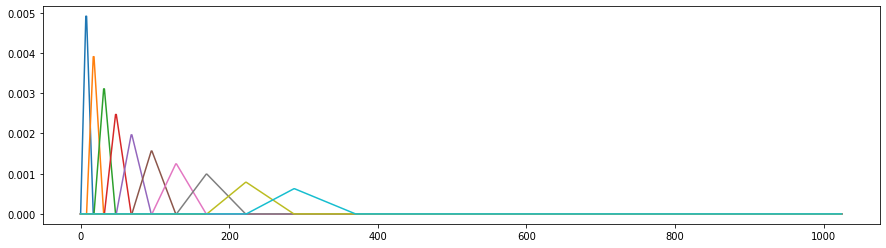

In [57]:
# taken from the librosa library
enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]
plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [58]:
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

(10, 6314)

In [60]:
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

In [61]:
dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

(40, 6314)

In [62]:
cepstral_coefficents[:, 0]


array([-1.01929056e+02, -7.08672021e-01, -1.09831162e+00, -1.14354738e+00,
       -5.03466316e-01, -5.98365825e-01,  6.50754329e-02,  3.14820906e-01,
        8.42184795e-01,  7.27523253e-01,  1.36593637e-13, -7.27523253e-01,
       -8.42184795e-01, -3.14820906e-01, -6.50754329e-02,  5.98365825e-01,
        5.03466316e-01,  1.14354738e+00,  1.09831162e+00,  7.08672021e-01,
        1.44149453e+02,  7.08672021e-01,  1.09831162e+00,  1.14354738e+00,
        5.03466316e-01,  5.98365825e-01, -6.50754329e-02, -3.14820906e-01,
       -8.42184795e-01, -7.27523253e-01, -2.72315627e-14,  7.27523253e-01,
        8.42184795e-01,  3.14820906e-01,  6.50754329e-02, -5.98365825e-01,
       -5.03466316e-01, -1.14354738e+00, -1.09831162e+00, -7.08672021e-01])

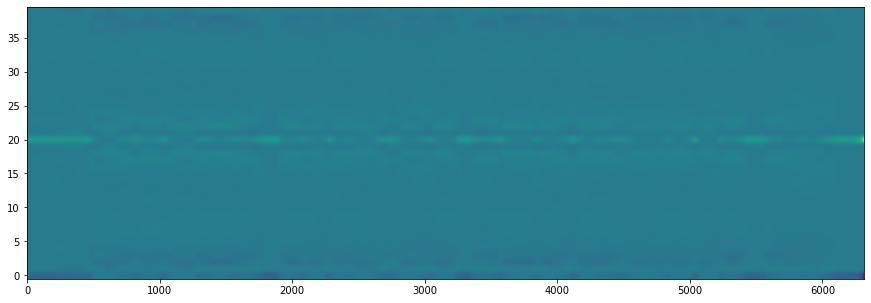

In [63]:
plt.figure(figsize=(15,5))
plt.plot(np.linspace(0, len(audio) / sample_rate, num=len(audio)), audio)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower');